### Automating GIS Processes 2018: Final Project work  
 Sara Todorovic, January 2019

## **Analysis of Urban Design and Structure in Different Neighborhoods**



### **1 Introduction**  

Analysing and comparing urban design and structure of different neighborhoods within a city can shed new light in understanding the city dynamics. Urban street networks show the structure of the neighborhood, and tell many stories about how densely built or inhabited the area is, and what kind of city and road network planning has been implemented in the area. Street network characteristics vary greatly in metropolitan and municipal levels, but as [Geoff Boeing states](https://journals.sagepub.com/doi/10.1177/2399808318784595), analysing street networks in neighborhood level reveals more individual urban design inventions as well as historical paradigms in the area. 

Thus I am interested in finding out visual and structural differences between neighborhoods in Helsinki municipality by creating tools to analyse urban design and structure by using [Geoff Boeing's OSMnx toolbox](https://www.sciencedirect.com/science/article/pii/S0198971516303970) to download and analyze street networks at metropolitan, municipal, and neighborhood scales. My aim is to create tools to analyse the following characteristics: 

- Comparing urban network structure in different suburbs  
- Comparing betweenness centrality  
- Visualizing street network and building structure

The tools created in this work should be applicable to any neighborhood with a street network - as well as whole cities, and the areas should be found in the [Open Street Map Nominatim](https://nominatim.openstreetmap.org).  

***

### **2 Data**  

All data used in this work is downloaded from Open Street Map using OSMnx tools by Geoff Boeing. Help and ideas are from Geoff Boeing's [GitHub repository](https://github.com/gboeing/osmnx-examples/tree/master/notebooks).  

***

### **3 Methods**  

I have created functions to form different indicators for urban design analysis. Functions will be presented one by one in the following section. Scripts are also stored in the *urban_indicators.py* -file, and the functions will be used in the results section with examples to analyse urban structure of chosen neighborhoods. 

I use following Python libraries in my codes: OSMnx, Geopandas, Pandas, Numpy and Matplotlib. The aim was to produce functions that only take in a list of place names, and as a result give a visual representation of each place. I combine materials taught in the Geo-Python and Automating GIS processes courses, online materials and Geoff Boeing's work. 

The results are divided into following indicators:  

- **Street network orientation**  
- **Building density**  
- **Visualizing building footprints**  

In this section I present the functions and their documentation, and use examples in the results section. The functions are also stored and documented in urban_indicators.py script file. 




#### First steps

First the necessary Python modules will be brought into the notebook. 


In [2]:
import osmnx as ox 
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Functions

**1. Geodataframe function**  
This function creates a geodataframe from a list of placenames by fetching it from OSM.

In [3]:
def urban_gdf(placenames):
    """
    Function for downloading a geodataframe from OSM from a list of places.

    Parameters
    ----------
    placenames: <list>
        List of places.
    Returns
    -------
    <geodataframe>
        Geodataframe containing geometry of the places.
    """ 
    # Using the function:
    # Fetch geodataframe from OSM
    gdf = ox.gdf_from_places(placenames)
    # Return geodataframe
    return gdf

**2. Graph list function**  
Function for downloading the networks as a list of graphs from OSM for a given list of place names  


In [4]:
def urban_getNetwork(placenames, nwtype):
    """
    Function for downloading networks as a list of graphs from OSM for a given list of place names

    Parameters
    ----------
    placenames: <list>
        List of places.

    Returns
    -------
    <list>
        List containing graphs fetched from OSM.
    """ 
    # Using the function: 
    
    # Empty list for the graphs that will be downloaded
    places_graph = []
    
    # For each place in the list of given placenames,
    for place in placenames:
        # Fetch the graph with the network type of choice
        graph = ox.graph_from_place(place, network_type = nwtype)
        # Add to the list
        places_graph.append(graph)
        
    # Return the list containing the graphs    
    return places_graph 

#### Network structure

**3. Visualising street network function**  
This function visualises the street networks for a given list of place names.  

In [5]:
def urban_visNetwork(placenames, nwtype):
    """
    Function for visualising networks as a list of graphs from OSM for a given list of place names

    Parameters
    ----------
    placenames: <list>
        List of places.
    nwtype: <string>
        Defines the network type that is downloaded from OSM.
    Returns
    -------
    <plot>
        Plots the street network of each place in the list of place names.
    """ 
    # Using the function:
    
    # For each place in a list of placenames
    for place in placenames:
        
        # Create the graphs
        graph = ox.graph_from_place(place, network_type = nwtype)
        
        # Print the placename for each graph
        print(graph)
        
        # Return the street network
        ax = ox.plot_graph(ox.project_graph(graph), node_size=0)

**4. Urban bearings function**  
This function calculates the edge bearings of the street network of a given list of places, and produces graphs showing the bearings of the network. Edge bearings show the direction of the roads inside the network, and thus by analysing it it can show a lot about the road network planning, for instance.  

In [6]:
def urban_bearings(placenames, nwtype, color):
    """
    Function for visualising the street network edge bearings as graphs.
    Produces as many graphs as there as components in the input list.

    Parameters
    ----------
    placenames: <list>
        List of places.
    nwtype: <string>
        Defines the network type that is downloaded from OSM.
    color: <string>
        Defines the color of the graph.
    Returns
    -------
    <graph>
        Graphs of the street network edge bearings.
    """ 
    # Using the function:
    
    # For each place in the list of given placenames,
    for place in placenames:
        
        # Create a variable G where you store the graph from the network
        G = ox.graph_from_place(place, network_type=nwtype)
        
        # Add edge bearings to G
        G = ox.add_edge_bearings(G)
        
        # Calculate edge bearings from the graph's edges
        bearings = pd.Series([data['bearing'] for u, v, k, data in G.edges(keys=True, data=True)])
        
        # Create a histogram and define parameters
        ax = bearings.hist(bins=30, zorder=2, alpha=0.8, color=color)
        
        # Set xlim as 360 (circle is 360 degrees)
        xlim = ax.set_xlim(0, 360)
        
        # Set the placename as the title of each individual graph in the list
        ax.set_title(place)
        
        # Show each graph
        plt.show()

**5. Polar plot function of edge bearings**  
This function creates polar plots of each place in a given list of place names. Polar plots can show very nicely and visually the street network orientation and allows the comparison between different kind of network structure. 

In [7]:
def urban_polarPlot(placenames, nwtype, color):
    """
    Function for visualising the street network edge bearings as polar plots,
    where the place's street network's edge bearings are spread as a circle of 0 to 360 degrees, 
    value indicating the orientation of the street.
    
    Produces as many polar plots as there as components in the input list.

    Parameters
    ----------
    placenames: <list>
        List of places.
    nwtype: <string>
        Defines the network type that is downloaded from OSM.
    color: <string>
        Defines the color of the graph.
    Returns
    -------
    <graph>
        Graphs of the street network edge bearings.
    """ 
    # Using the function:
    
    # For each place in the list of given placenames,
    for place in placenames:
        
        # Create a variable G where you store the graph from the network
        G = ox.graph_from_place(place, network_type=nwtype)
        # Add edge bearings to G
        G = ox.add_edge_bearings(G)
        # Calculate edge bearings from the graph's edges
        bearings = pd.Series([data['bearing'] for u, v, k, data in G.edges(keys=True, data=True)])
        
        # Create a numpy histogram with 360 degrees
        n = 30
        count, division = np.histogram(bearings, bins=[ang*360/n for ang in range(0,n+1)])
        division = division[0:-1]
        # Setting width to be visually nice
        width =  2 * np.pi/n
        # Set the projection to polar, and axis zero location and direction
        ax = plt.subplot(111, projection='polar')
        ax.set_theta_zero_location('N')
        ax.set_theta_direction('clockwise')
        
        # Axis bars
        bars = ax.bar(division * np.pi/180 - width * 0.5 , count, width=width, bottom=0.0, color=color)
        ax.set_title(place, y=1.1)
        # Set x tick labels to North, East, South and West
        xticklabels = ['N', '', 'E', '', 'S', '', 'W', '']
        ax.set_xticklabels(labels=xticklabels)
        
        plt.show()
        

#### Building density and footprint visualisation

**6. Building density function**  
This function takes in a list of place names, and calculates the building footprint within the area limits and returns the area covered in buildings, as well as the building density (proportion of building area in the area, %).  


In [8]:
def urban_bdensity(placenames):
    """
    Function that calculates the building density within the area limits of the places, 
    that are given to the function as the input.

    Parameters
    ----------
    placenames: <list>
        List of places.
    Returns
    -------
    <print>
        Returns a print stating the name of the place, 
        the are covered in buildings (m2) within the area limits, 
        and the proportion of buildings in the area (%).
    """ 
    # Using the function:
    
    # For each place in the list of given placenames,
    for place in placenames:
        
        #Download the buildings from the place
        gdf = ox.buildings_from_place(place)
        
        #Project the geodataframe
        gdf_proj = ox.project_gdf(gdf)

        # Calculate the area of building footprint
        areas = gdf_proj.area
        
        # Sum of the total building areas
        areasum = sum(areas)
        
        # Get geodataframe of the place and project it
        place_a = ox.gdf_from_place(place)
        place_proj = ox.project_gdf(place_a)
        
        # Calculate building area (m2)
        building_area = place_proj.area.iloc[0]
        
        # Calculate building density
        building_density = areasum / building_area
        
        # Return a print of the place, area covered in buildings (m2) and proportion of buildings (%)
        print(place, ": Area covered in buildings is ", 
              round(building_area, 3), 
              'm2 and the proportion of buildings in total is', 
              round(building_density*100, 3), "%.")
    

**7. Urban neighborhood visualisation function**  
This function creates an urban visualisation of the building footprint and street network from each place from a list, that is given as an input. User also defines the street network type, color is default. In the end, the function saves each plot to images-folder. 

In [9]:
def urban_plotmaker(placenames, nwtype, color = 'orange'):
    """
    Function that visualizes the building footprint and 
    street network from each place from the input list.

    Parameters
    ----------
    placenames: <list>
        List of places.
    nwtype: <string>
        Defines the network type that is downloaded from OSM.
    Returns
    -------
    <graph>
        Returns a graph of the building footprint, area footprint and the street network with a title.
        Saves the figure in the images-folder.
    """ 
    # Using the function:
    
    # For each place in the list of given placenames,
    for place in placenames:
        # Retrieve area footprint as a geodataframe and reproject it
        area = ox.project_gdf(ox.gdf_from_place(place))

        # Retrieve building footprint as a geodataframe and reproject it
        buildings = ox.project_gdf(ox.buildings_from_place(place))
        
        # Retrieve the street network as a geodataframe and reproject it
        graph= ox.graph_from_place(place, network_type=nwtype)
        nodes, edges = ox.graph_to_gdfs(graph)
        edges_proj = ox.project_gdf(edges)
        
        # Plot the area, network and buildings
        ax = area.plot(facecolor='black', figsize=(8,8))
        edges_proj.plot(ax=ax, color='white', linewidth=0.7, alpha = 0.7)
        buildings.plot(ax=ax, facecolor=color)
        
        # Set title font and bolding
        title_font = {'size':18, 'weight':'bold'}
        
        # Set title
        ax.set_title(place, fontdict = title_font)
        
        # Turn the axis off from the plot
        ax.set_axis_off()
        
        # Set the filename (split the string so the name has only the first part)
        filename = 'urban-structure-'+ place.split(',', 1)[0]+'.png'
        
        # Save the figure
        plt.savefig('images/'+filename, dpi=120)
        

***
### **4 Results**

In this section I present examples of two neighborhoods in Helsinki, Finland by using the created functions to analyse urban structure of these neighborhoods. The ultimate goal of these functions is to enable repetition, therefore in the end I show examples of areas with a bigger scale, and change the number of names on the list.  The placenames need to be found as *areas* in the OSM Nominatim, otherwise the analysis will not work and the code will give an error (neighborhoods and cities are just a point). 



#### Area of interest  
To start with the analysis, determine the area of interest as a *list*. 

In [10]:
# Determine places of interest and save them to variable 'places'
places = ['Kamppi, Helsinki, Finland', 'Herttoniemi, Helsinki, Finland']

Next we would like to look at the areas as a geodataframe, just to be sure the places actually exist. 
For that, we use a function **urban_gdf**.  

#### 1 Using the function **urban_gdf:**

In [11]:
# Create geodataframe using a function
gdf = urban_gdf(places)
type(gdf)

geopandas.geodataframe.GeoDataFrame

In [12]:
# See how it looks like
gdf

,bbox_east,bbox_north,bbox_south,bbox_west,geometry,place_name
0,24.943453,60.172109,60.160474,24.920742,"POLYGON ((24.9207417 60.1669034, 24.9207454 60...","Kamppi, Southern major district, Helsinki, Hel..."
1,25.076456,60.219324,60.183077,25.006944,"POLYGON ((25.0069443 60.2047761, 25.0197819 60...","Herttoniemi, Helsinki, Helsinki sub-region, Uu..."


We can see that it is a geodataframe, it has geometry and placenames.

***
### Network structure and orientation  
#### Network structure  

The functions used in this sections are used to display the street network structure, and the orientation of the street network in the area of interest. In OSM it is possible to choose the network type from the following list:

* drive - get drivable public streets (but not service roads)  
* drive_service - get drivable streets, including service roads  
* walk - get all streets and paths that pedestrians can use (this network type ignores one-way directionality)  
* bike - get all streets and paths that cyclists can use  
* all - download all non-private OSM streets and paths  
* all_private - download all OSM streets and paths, including private-access ones



#### 2 Using function **urban_getNetwork** to fetch graphs for each place in the list:

In [13]:
# Function input is a list of placenames, and network type is 'drive'
graphs = urban_getNetwork(places, nwtype ='drive')

# View the list
graphs

* We can see that the output is a list containing two multigraphs, because there are two places in the list (Kamppi and Herttoniemi).  



#### 3 Using function **urban_visNetwork** to visualise street networks of a given list of place names:  

Next we will download the street network for the places in the list by using a function. 

Kamppi, Helsinki, Finland


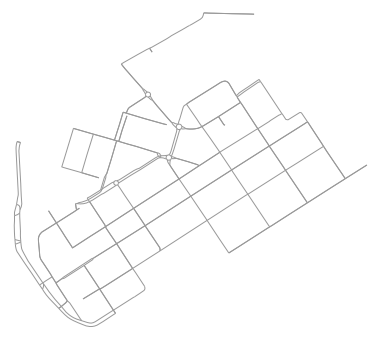

Herttoniemi, Helsinki, Finland


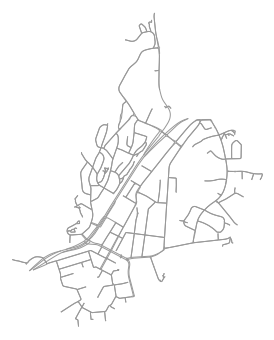

In [14]:
# In the function define a list of placenames and network type
# in this case it is 'drive' for driveable roads.
network = urban_visNetwork(places, nwtype = 'drive')

# View the result
network

Output gives two street network graphs, since there are two names in the input list. We can see from the graphs that the networks look quite different - Kamppi has a more rectangular network shape whereas Herttoniemi's roads are more irregular. Let's see next how the roads are oriented.

#### 4 Using **urban_bearings** function: 

Urban bearings function produces graphs that show the street orientation, and thus shows how regular the network is. From the previous graphs of the network we could assume that Kamppi's edge bearings are more regularly oriented unlike Herttoniemi's. 

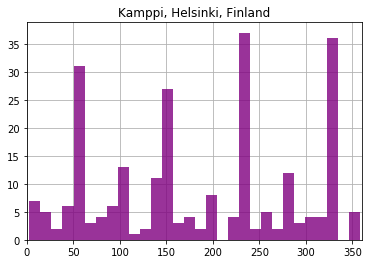

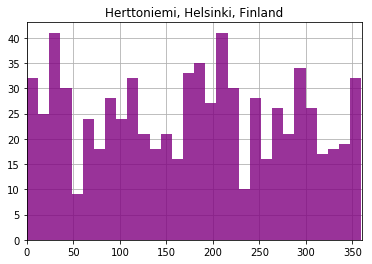

In [15]:
# Inside the function define the places list, network type as 'drive' and choose a color you like
bearings = urban_bearings(places, nwtype='drive', color='purple')

# Show the graphs
bearings

From the x-axis we can see the orientation from 0 to 360 degrees, and as predicted Kamppi has four clear peaks, and Herttoniemi's streets are more evenly distributed along the scale. Y-axis shows the frequency. 

#### 4 Using **urban_polarPlot** function:  
To make the analysis more visual, we will plot Kamppi's and Herttoniemi's network orientation as a polar plot to show the actual compass points. A list of places, again, is given as an input, and the function will create as many plots as there are places in the list.


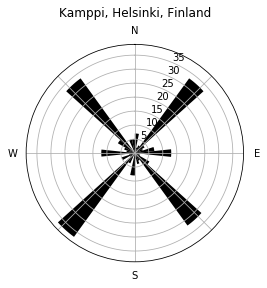

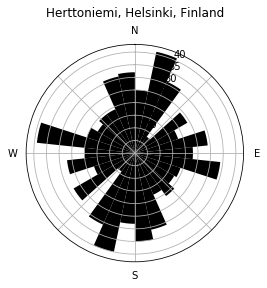

In [16]:
# Inside the function define the places list, network type and color as you like

polar = urban_polarPlot(places, nwtype='drive', color='black')

# Print the plots
polar

These graphs show the orientation of the street network even better than the graph of urban bearings: If you compare these with the street network graphs, you can clearly see that Kamppi's streets are north-east/south-west and north-west/south-east oriented, and Herttoniemi's quite irregular respectively. 

#### 5 Using **urban_bdensity** function:  
With OSM it is possible to download very elaborate building data, which enables the analysis of building density in any reagion. With this function we can calculate the building density of all the places from a list that is given as an input parameter. Let's calculate the building area and proportion of buildings in Kamppi and Herttoniemi:

In [17]:
# Input is just a list of places
density = urban_bdensity(places)

# Show results
density

Kamppi, Helsinki, Finland : Area covered in buildings is  941021.402 m2 and the proportion of buildings in total is 44.416 %.
Herttoniemi, Helsinki, Finland : Area covered in buildings is  7572380.921 m2 and the proportion of buildings in total is 9.503 %.


* The output gives all the places from the list and the area covered in buildings in the whole neighborhood in sq meters, and the proportion of buildings in the total area in percents.  

From these results we can see that the area covered in buildings in Herttoniemi is much larger than in Kamppi, but the proportion is smaller, meaning that the total area of Herttoniemi is significantly larger than Kamppi. With this function we can nicely compare the urbanity of different areas. 

#### 6 Using **urban_plotmaker** function:  
Plotmaker-function visualises the urban structure to better understand the dynamics of the area. It combines the total area footprint, the building footprint and the network in the particular area, and saves the output in the *images*-file as a separate image named after the place. 

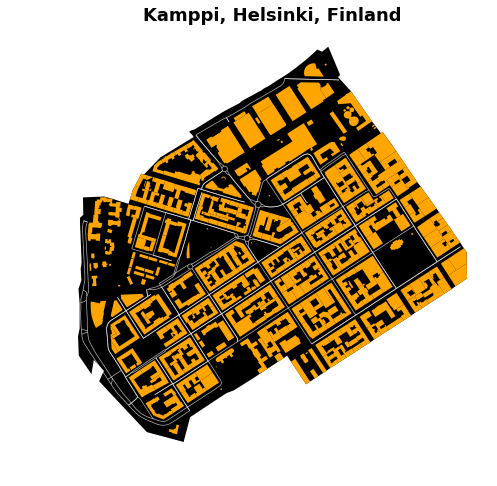

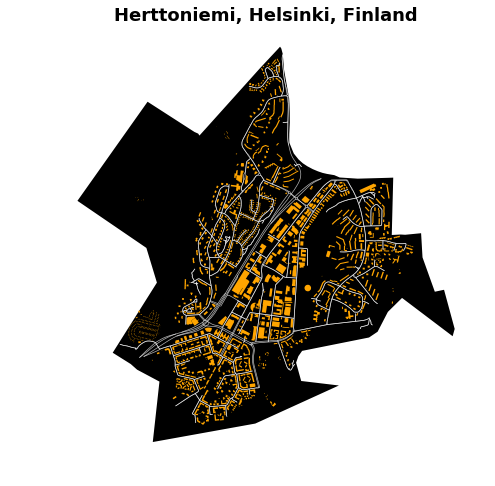

In [20]:
# Give the list of places as the input and define network type
outputs = urban_plotmaker(places, nwtype='drive')

# View the outputs
outputs

Now we can for example see, why the number for proportion of buildings in Herttoniemi is so small (9.5 %). 

### Examples with different measures  

Previous examples were done with two neighborhoods in a list, so in the next section I will repeat some of the functions with 1) three Helsinki neighborhoods on the list, 2) one neighborhood abroad.

In [18]:
# Create two new lists

names = ['Vuosaari, Helsinki, Finland', 'Sörnäinen, Helsinki, Finland', 'Malmi, Helsinki, Finland']
name = ['Manhattan, NYC, USA']

For 'names' let's create the polar plots: 

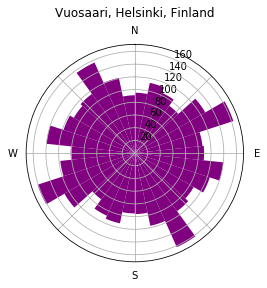

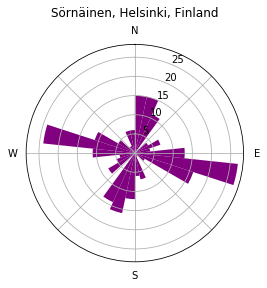

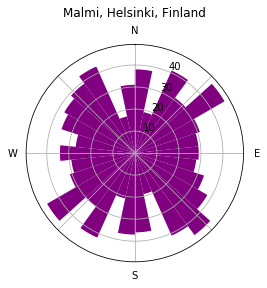

In [23]:
# Give the function a list of placenames, and define network type and plot color
polar_2 = urban_polarPlot(names, nwtype='drive', color = 'purple')

# See the plots
polar_2

Now let's create a building footprint visualisation for Manhattan:

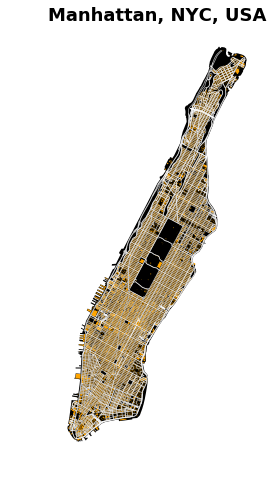

In [20]:
# Define the place and network type
manhattan = urban_plotmaker(name, nwtype = 'drive')

# Show the plot
manhattan

***
### **4 Discussion**

These tools provide simple methods to visually compare urban structure of different neighborhoods. Network and building footprints can tell to a great extend about the history and urbanity of an area, and with these simple tools one can make quick visualisations and get some basic information about different neighborhoods. 

My goal was to practice using functions in analysing OSM data, because during the course practicals we did not get to practice those too much. I find the OSMnx package interesting and full of possibilities, and this work is just a scratch of what is possible to do with it. Basically could be possible to analyse the whole world with OSMnx by using these tools.  


Since the data is completely open and up-to-date, I find that the greatest limitation in my work was the reliability on a fast internet network - which is why I am eager to continue this work when I have better access to internet (my flat in Belgrade does not provide one...). Working with functions, especially linking functions within and inside functions and repeating myself less, is something I still need to practice a lot to automate the processes even better.

***  


Thank you a lot for the course - it has given so many valuable skills and motivation to learn even more! :-)